# Data acquisition

In [1]:
import numpy as np
import pyodbc 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import PercentFormatter

In [5]:
#Carga Ordenes
strqueryOrders = r'C:\Users\usuario\Desktop\CoderData\Data\olist_orders_dataset.csv'
#Carga Lineas de pedido de cada orden
strqueryOrderItems = r'C:\Users\usuario\Desktop\CoderData\Data\olist_order_items_dataset.csv'
#Carga Productos
strqueryProductos = r'C:\Users\usuario\Desktop\CoderData\Data\olist_products_dataset.csv'
#Carga Vendedores
strquerySellers = r'C:\Users\usuario\Desktop\CoderData\Data\olist_sellers_dataset.csv'
#Carga Pagos de ordenes
strqueryPayments = r'C:\Users\usuario\Desktop\CoderData\Data\olist_order_payments_dataset.csv'
#Carga Clientes
strqueryCustomers = r'C:\Users\usuario\Desktop\CoderData\Data\olist_customers_dataset.csv'
#Carga Reviews
strqueryReviews = r'C:\Users\usuario\Desktop\CoderData\Data\olist_order_reviews_dataset.csv'
#Carga Categoria Productos
strqueryCatProd = r'C:\Users\usuario\Desktop\CoderData\Data\product_category_name_translation.csv'

dfOrders = pd.read_csv(strqueryOrders, sep = ",")
dfOrderItems = pd.read_csv(strqueryOrderItems, sep = ",")
dfProductos = pd.read_csv(strqueryProductos, sep = ",")
dfOrderSellers = pd.read_csv(strquerySellers, sep = ",")
dfOrderPayments = pd.read_csv(strqueryPayments, sep = ",")
dfCustomers=pd.read_csv(strqueryCustomers, sep = ",")
dfOrderReviews = pd.read_csv(strqueryReviews, sep = ",")
dfPrdCat=pd.read_csv(strqueryCatProd, sep = ",")


## EDA

In [6]:
dfOrders.head().round()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
dfOrderItems.head().round()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,59.0,13.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,240.0,20.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,18.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,13.0,13.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,200.0,18.0


In [8]:
dfPrdCat.head().round()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
dfOrderSellers.head().round()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
dfOrderPayments.head().round()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,66.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,108.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.0


In [11]:
dfCustomers.head().round()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
dfOrderReviews.head().round()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
dfPrdCat.head().round()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
#Dimension del dataset
print('Shape Ordenes: ', dfOrders.shape)
print('Shape Items por orden: ', dfOrderItems.shape)
print('Shape Productos: ', dfProductos.shape)
print('Shape Sellers: ', dfOrderSellers.shape)
print('Shape Pagos: ', dfOrderPayments.shape)
print('Shape Customers: ', dfCustomers.shape)
print('Shape Reviews: ', dfOrderReviews.shape)
print('Shape Categoria Productos: ', dfPrdCat.shape)


Shape Ordenes:  (99441, 8)
Shape Items por orden:  (112650, 7)
Shape Productos:  (32951, 9)
Shape Sellers:  (3095, 4)
Shape Pagos:  (103886, 5)
Shape Customers:  (99441, 5)
Shape Reviews:  (100000, 7)
Shape Categoria Productos:  (71, 2)


In [15]:
#Nombre de los atributos
dfOrders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [16]:
dfOrderItems.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [17]:
dfProductos.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [18]:
dfOrderSellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [19]:
dfOrderPayments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [20]:
dfCustomers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [21]:
dfOrderReviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [22]:
dfPrdCat.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [23]:
#Tipo de dato para cada columna
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
dfOrderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Existen columnas sin datos. La conclusión temprana es que son aquellos pedidos que están pendientes de aprobacion y/o entrega

In [25]:
dfProductos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
dfOrderSellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [27]:
dfOrderPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
dfOrderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
dfPrdCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
#Desactivo warnings para facilitar lectura
import warnings
warnings.filterwarnings("ignore")

In [32]:
#Primeras estadisticas
dfOrders.describe().round()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,d089955a4f09c3d031b4a8b99017417c,13de57df53d909438cd6aa93345ad87e,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [33]:
dfOrderItems.describe().round()

,order_item_id,price,freight_value
count,112650.0,112650.0,112650.0
mean,1.0,121.0,20.0
std,1.0,184.0,16.0
min,1.0,1.0,0.0
25%,1.0,40.0,13.0
50%,1.0,75.0,16.0
75%,1.0,135.0,21.0
max,21.0,6735.0,410.0


In [34]:
dfPrdCat.describe().round()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,construcao_ferramentas_seguranca,home_appliances
freq,1,1


In [35]:
dfOrderSellers.describe().round()

,seller_zip_code_prefix
count,3095.0
mean,32291.0
std,32713.0
min,1001.0
25%,7094.0
50%,14940.0
75%,64552.0
max,99730.0


In [36]:
dfOrderPayments.describe().round()

,payment_sequential,payment_installments,payment_value
count,103886.0,103886.0,103886.0
mean,1.0,3.0,154.0
std,1.0,3.0,217.0
min,1.0,0.0,0.0
25%,1.0,1.0,57.0
50%,1.0,1.0,100.0
75%,1.0,4.0,172.0
max,29.0,24.0,13664.0


In [37]:
dfCustomers.describe().round()

,customer_zip_code_prefix
count,99441.0
mean,35137.0
std,29798.0
min,1003.0
25%,11347.0
50%,24416.0
75%,58900.0
max,99990.0


In [38]:
dfOrderReviews.describe().round()

,review_score
count,100000.0
mean,4.0
std,1.0
min,1.0
25%,4.0
50%,5.0
75%,5.0
max,5.0


In [39]:
dfPrdCat.describe().round()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,construcao_ferramentas_seguranca,home_appliances
freq,1,1


Una vez analizados los datasets individuales, es necesario combinarlos para realizar un análisis mas detallado

In [40]:
#Merge de Ordenes con sus lineas de pedidos
dfOrdenesCompletas=pd.merge(dfOrders, dfOrderItems, left_on='order_id', right_on='order_id')
#Merge de Ordenes con sus clientes
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfCustomers, on='customer_id')
#Merge de Ordenes con productos
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfProductos, on='product_id')
#Merge de Ordenes con pagos
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfOrderPayments, on='order_id')
#Merge de Ordenes con Vendedores
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfOrderSellers, on='seller_id')
#Merge de Ordenes con categoría de productos
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfPrdCat, on='product_category_name')
#Merge de Ordenes con review de clientes
dfOrdenesCompletas=dfOrdenesCompletas.merge(dfOrderReviews, on='order_id')





In [41]:
dfOrdenesCompletas.head(25)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2,be03d93320192443b8fa24c0ca6ead98,...,9350,maua,SP,housewares,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02
7,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,1,d4a3b5aa064bf44e74f1e71862bea22a,...,14021,ribeirao preto,SP,housewares,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02
8,1fa40f202d5d233b6491e976c557b822,50fd5707c28d0a64dc20d67f937dd9ba,delivered,2017-09-23 22:11:10,2017-09-23 22:25:11,2017-09-26 17:27:54,2017-10-19 21:09:21,2017-11-13 00:00:00,1,8415b1dae10d2dcb36beec370c6a90cd,...,9350,maua,SP,housewares,4b70092fc12f2328972d5ff1022d87e9,4,NaN,NaN,2017-10-20 00:00:00,2017-10-23 04:13:41
9,41c045db2d1876be9f05cf4a787693b2,a286f46d6e54cc0179bbb0ee07b0df5e,delivered,2017-08-16 14:06:30,2017-08-16 14:55:20,2017-08-18 15:41:40,2017-08-21 15:05:13,2017-08-29 00:00:00,1,5e18248fc768bdb7fc69fd012068d109,...,9350,maua,SP,housewares,b9e086024ceb0234e5950016497a4928,5,NaN,NaN,2017-08-22 00:00:00,2017-08-26 02:31:53


In [42]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   customer_id                    116581 non-null  object 
 2   order_status                   116581 non-null  object 
 3   order_purchase_timestamp       116581 non-null  object 
 4   order_approved_at              116567 non-null  object 
 5   order_delivered_carrier_date   115368 non-null  object 
 6   order_delivered_customer_date  114066 non-null  object 
 7   order_estimated_delivery_date  116581 non-null  object 
 8   order_item_id                  116581 non-null  int64  
 9   product_id                     116581 non-null  object 
 10  seller_id                      116581 non-null  object 
 11  shipping_limit_date            116581 non-null  object 
 12  price                         

In [43]:
dfOrdenesCompletas.describe().round()

,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,116581.0,116581.0,116581.0,116581.0,116581.0,116581.0,116581.0,116580.0,116580.0,116580.0,116580.0,116581.0,116581.0,116581.0,116581.0,116581.0
mean,1.0,121.0,20.0,35053.0,49.0,786.0,2.0,2116.0,30.0,17.0,23.0,1.0,3.0,173.0,24505.0,4.0
std,1.0,184.0,16.0,29818.0,10.0,653.0,2.0,3784.0,16.0,13.0,12.0,1.0,3.0,268.0,27625.0,1.0
min,1.0,1.0,0.0,1003.0,5.0,4.0,1.0,0.0,7.0,2.0,6.0,1.0,0.0,0.0,1001.0,1.0
25%,1.0,40.0,13.0,11310.0,42.0,346.0,1.0,300.0,18.0,8.0,15.0,1.0,1.0,61.0,6429.0,4.0
50%,1.0,75.0,16.0,24315.0,52.0,600.0,1.0,700.0,25.0,13.0,20.0,1.0,2.0,108.0,13690.0,5.0
75%,1.0,135.0,21.0,58600.0,57.0,983.0,3.0,1800.0,38.0,20.0,30.0,1.0,4.0,190.0,28495.0,5.0
max,21.0,6735.0,410.0,99980.0,76.0,3992.0,20.0,40425.0,105.0,105.0,118.0,29.0,24.0,13664.0,99730.0,5.0


## Análisis de datos nulos, faltantes

In [44]:
#Declaro array para recorrer el data set para obtener los indices NAN
#Listo los resultados
Campos_Nulos= [feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].isnull().sum()>=1]
for feature in Campos_Nulos:
    print(feature, np.round(dfOrdenesCompletas[feature].isnull().mean()*100,4),'%', ' y el total de nulos es ', np.round(dfOrdenesCompletas[feature].isnull().sum(),4))

order_approved_at 0.012 %  y el total de nulos es  14
order_delivered_carrier_date 1.0405 %  y el total de nulos es  1213
order_delivered_customer_date 2.1573 %  y el total de nulos es  2515
product_weight_g 0.0009 %  y el total de nulos es  1
product_length_cm 0.0009 %  y el total de nulos es  1
product_height_cm 0.0009 %  y el total de nulos es  1
product_width_cm 0.0009 %  y el total de nulos es  1
review_comment_title 87.9946 %  y el total de nulos es  102585
review_comment_message 57.216 %  y el total de nulos es  66703


In [45]:
dfOrdenesCompletas.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1


## Data wrangling

In [46]:
#Limpieza de fechas nulas.

#Se guardan los indices donde las fechas de aprobacion son nulas 
index=(dfOrdenesCompletas[dfOrdenesCompletas['order_approved_at'].isnull()==True].index.values)

#Completamos la fecha de aprobación nula con la fecha de compra, asumiendo un proceso de aprobación automatica
dfOrdenesCompletas['order_approved_at'].fillna(dfOrdenesCompletas['order_purchase_timestamp'], inplace=True)

#La fecha de entrega al cliente nula, la completamos con la fecha estimada de entrega
index=(dfOrdenesCompletas[dfOrdenesCompletas['order_delivered_customer_date'].isnull()==True].index.values)
dfOrdenesCompletas['order_delivered_customer_date'].fillna(dfOrdenesCompletas['order_estimated_delivery_date'], inplace=True)

#La fecha de entrega carrier nula, la completamos con la fecha estimada de entrega
index=(dfOrdenesCompletas[dfOrdenesCompletas['order_delivered_carrier_date'].isnull()==True].index.values)
dfOrdenesCompletas['order_delivered_carrier_date'].fillna(dfOrdenesCompletas['order_estimated_delivery_date'], inplace=True)


In [47]:
#Chequeo resultados 
Campos_Nulos= [feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].isnull().sum()>=1]
for feature in Campos_Nulos:
    print(feature, np.round(dfOrdenesCompletas[feature].isnull().mean()*100,4),'%', ' y el total de nulos es ', np.round(dfOrdenesCompletas[feature].isnull().sum(),4))

product_weight_g 0.0009 %  y el total de nulos es  1
product_length_cm 0.0009 %  y el total de nulos es  1
product_height_cm 0.0009 %  y el total de nulos es  1
product_width_cm 0.0009 %  y el total de nulos es  1
review_comment_title 87.9946 %  y el total de nulos es  102585
review_comment_message 57.216 %  y el total de nulos es  66703


In [48]:
#Relleno el producto NAN con la media
for feature in Campos_Nulos:
    if 'product' in feature:
        dfOrdenesCompletas[feature].fillna(dfOrdenesCompletas[feature].median(), inplace=True)

In [49]:
#Relleno los NAN de Product Reviews con "Sin Titulo" y "Sin Comentarios"
dfOrdenesCompletas['review_comment_message'].fillna('Sin Revision', inplace=True)
dfOrdenesCompletas['review_comment_title'].fillna('Sin Titulo', inplace=True)


In [50]:
dfOrdenesCompletas.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments

In [51]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   customer_id                    116581 non-null  object 
 2   order_status                   116581 non-null  object 
 3   order_purchase_timestamp       116581 non-null  object 
 4   order_approved_at              116581 non-null  object 
 5   order_delivered_carrier_date   116581 non-null  object 
 6   order_delivered_customer_date  116581 non-null  object 
 7   order_estimated_delivery_date  116581 non-null  object 
 8   order_item_id                  116581 non-null  int64  
 9   product_id                     116581 non-null  object 
 10  seller_id                      116581 non-null  object 
 11  shipping_limit_date            116581 non-null  object 
 12  price                         

Para este ejercicio convertiremos los campos de fecha solo para diferenciar el dtype de los campos de textos que se usaran para clasificar, dado que no se utilizarán para la práctica final que no incluye análisis de series de tiempo

In [52]:
Fechas=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date' , 'order_delivered_customer_date','order_estimated_delivery_date','review_creation_date','review_answer_timestamp','shipping_limit_date']
for columns in Fechas:
    dfOrdenesCompletas[columns]=dfOrdenesCompletas[columns].astype('datetime64[ns]')

In [53]:
dfOrdenesCompletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116581 non-null  object        
 1   customer_id                    116581 non-null  object        
 2   order_status                   116581 non-null  object        
 3   order_purchase_timestamp       116581 non-null  datetime64[ns]
 4   order_approved_at              116581 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116581 non-null  datetime64[ns]
 6   order_delivered_customer_date  116581 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116581 non-null  datetime64[ns]
 8   order_item_id                  116581 non-null  int64         
 9   product_id                     116581 non-null  object        
 10  seller_id                      116581 non-null  object        
 11  

In [54]:
#Seleccion de segmentaciones
features_numericos=[feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].dtype =='int64']

In [55]:
features_categoricos=[feature for feature in dfOrdenesCompletas.columns if dfOrdenesCompletas[feature].dtype=='object']

In [56]:
features_numericos

['order_item_id',
 'customer_zip_code_prefix',
 'payment_sequential',
 'payment_installments',
 'seller_zip_code_prefix',
 'review_score']

In [57]:
features_categoricos

['order_id',
 'customer_id',
 'order_status',
 'product_id',
 'seller_id',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'product_category_name',
 'payment_type',
 'seller_city',
 'seller_state',
 'product_category_name_english',
 'review_id',
 'review_comment_title',
 'review_comment_message']

## Analisis Univariado

In [58]:
# Análisis univariado sobre clientes
dfClientes=dfOrdenesCompletas[['customer_id', 'payment_value', 'order_id', 'customer_city', 'customer_state', 'customer_unique_id', 'payment_type']]

In [59]:
dfClientes.head()

,customer_id,payment_value,order_id,customer_city,customer_state,customer_unique_id,payment_type
0,9ef432eb6251297304e76186b10a928d,18.12,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,credit_card
1,9ef432eb6251297304e76186b10a928d,2.00,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,voucher
2,9ef432eb6251297304e76186b10a928d,18.59,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,voucher
3,a20e8105f23924cd00833fd87daa0831,37.77,128e10d95713541c87cd1a2e48201934,sao paulo,SP,3a51803cc0d012c3b5dc8b7528cb05f7,credit_card
4,26c7ac168e1433912a51b924fbd34d34,37.77,0e7e841ddf8f8f2de2bad69267ecfbcf,sao paulo,SP,ef0996a1a279c26e7ecbd737be23d235,credit_card


In [60]:
#Análisis de pagos por estado
dfClientes.groupby(by='customer_state')[['payment_value']].agg(['sum','mean','median']).sort_values(by=('payment_value','sum'),ascending=False)

payment_value                     
                         sum        mean   median
customer_state                                   
SP                7553411.48  153.733977   97.580
RJ                2747860.23  180.958856  114.560
MG                2310633.09  170.778499  112.760
RS                1135485.31  176.427177  115.365
PR                1058906.29  179.232615  109.805
BA                 788769.11  197.488510  117.960
SC                 779608.48  183.264805  116.995
GO                 507682.90  211.887688  117.045
DF                 432733.16  175.408658  114.350
ES                 405492.65  173.881925  111.020
PE                 371964.62  198.064228  133.040
CE                 338806.08  220.290039  134.765
MT                 255908.18  229.308405  129.160
PA                 251237.69  227.776691  148.040
MA                 196953.12  235.027589  138.120
PB                 177781.66  282.193111  155.315
MS                 165370.08  195.242125  123.530
PI                 136021.99  239.897690  152.620
RN                 115621.14  204.639186  138.240
AL                 110896.67  242.132467  138.090
SE                  88214.47  223.327772  144.120
TO                  71505.56  214.088503  137.330
RO                  64967.06  232.025214  158.805
AM                  33559.12  197.406588  126.900
AC                  24857.52  267.285161  186.830
AP                  21642.70  257.651190  166.600
RR                  12160.39  243.207800  167.240

In [61]:
#Análisis de consumos por estado

dfClientes.sort_values(by='customer_state',ascending=False)
dfAcumuladosClientes = dfClientes.groupby(by='customer_state')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)
dfAcumuladosClientes['Participacion Porcentual'] = dfAcumuladosClientes.apply(lambda x: (x/(x.sum()))*100)
dfAcumuladosClientes['Porcentaje acumulado'] = dfAcumuladosClientes['Participacion Porcentual'].cumsum()/dfAcumuladosClientes['Participacion Porcentual'].sum()*100
dfAcumuladosClientes.sort_values(by='Porcentaje acumulado',ascending=False)
dfAcumuladosClientes

,customer_id,Participacion Porcentual,Porcentaje acumulado
,count,,
customer_state,,,
SP,49133,42.144946,42.144946
RJ,15185,13.025279,55.170225
MG,13530,11.605665,66.775890
RS,6436,5.520625,72.296515
PR,5908,5.067721,77.364236
SC,4254,3.648965,81.013201
BA,3994,3.425944,84.439145
DF,2467,2.116125,86.555271


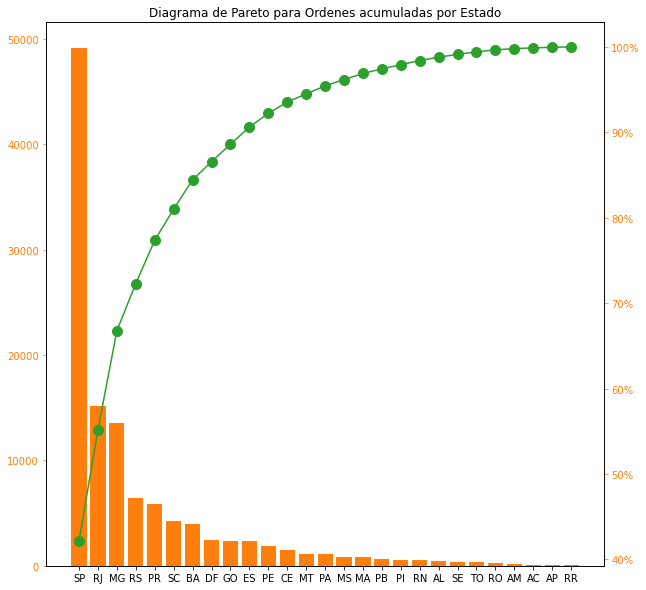

In [62]:
#Diagrama de Pareto
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(dfAcumuladosClientes.index, dfAcumuladosClientes[('customer_id','count')], color="C1")
ax2 = ax.twinx()
ax2.plot(dfAcumuladosClientes.index, dfAcumuladosClientes['Porcentaje acumulado'], color="C2", marker="o", ms=10)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C1")
ax2.tick_params(axis="y", colors="C1")
ax2.set_title('Diagrama de Pareto para Ordenes acumuladas por Estado')
plt.show()

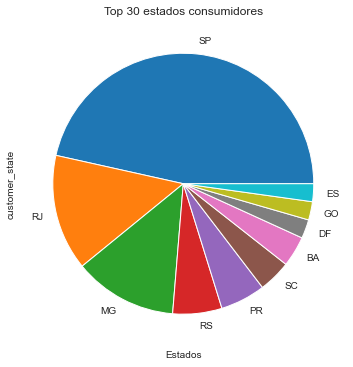

In [63]:
#Participación de los principales estados de consumo
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
ax = dfClientes.customer_state.value_counts().sort_values(ascending=False)[0:10].plot(kind='pie')
ax.set_title("Top 30 estados consumidores")
ax.set_xlabel("Estados")
plt.xticks(rotation=35)
plt.show()

### Conclusion 1

El 67% de las ganancias por ventas provienen de Sao Paulo, Rio de Janeiro y Minas Gerais con mayor concentración en Sao Paulo (Monto por Ventas). Esto permitiría a Olist concentrase en dichos estados por sobre el resto.

Debería hacerse un análisis detallado de los productos consumidos en cada región para entender el patrón de consumo (la mediana de las ordenes indica que no está en esos 3 estados el valor mas alto por orden)

In [64]:
dfPagos = dfClientes.groupby(by='payment_type')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)

dfPagos['Porcentaje de Consumidores'] = dfPagos.apply(lambda x: (x/(x.sum()))*100)

dfPagos['Payments'] = np.round(dfClientes.groupby(by='payment_type')[['payment_value']].agg(['sum']),4)

Monto_Total = dfPagos['Payments'].sum()
dfPagos

,customer_id,Porcentaje de Consumidores,Payments
,count,,
payment_type,,,
credit_card,86012,73.778746,15481976.14
boleto,22692,19.464578,4024296.19
voucher,6211,5.327626,401700.56
debit_card,1666,1.429049,250077.86


### Conclusion 2

74% de las ventas se abonan con tarjeta de crédito

19% de las ventas se abonan con boleto

El bajo porcentaje de utilización de vouchers señala una posibilidad de marketing y estrategia de fidelizacion de clientes

In [65]:
import pandas_profiling
from pandas_profiling import ProfileReport

report = ProfileReport(dfOrdenesCompletas)

print(repr(report.report))

report.to_widgets()



Root


## Analisis bivariado


In [66]:
#Análisis de los productos preferidos
dfProdPreferences = dfOrdenesCompletas.groupby(by='product_category_name_english')[['customer_id']].agg(['count']).sort_values(by=('customer_id','count'),ascending=False)
dfProdPreferences['Porcentaje de participación de Consumidores'] = dfProdPreferences.apply(lambda x: (x/(x.sum()))*100)
dfProdPreferences

,customer_id,Porcentaje de participación de Consumidores
,count,
product_category_name_english,,
bed_bath_table,11990,10.284695
health_beauty,10030,8.603460
sports_leisure,9005,7.724243
furniture_decor,8833,7.576706
computers_accessories,8151,6.991705
...,...,...
arts_and_craftmanship,24,0.020587
la_cuisine,16,0.013724


In [67]:
dfPrincipalProductoConsumido = dfProdPreferences[0:10]
dfPrincipalProductoConsumido.sum()

customer_id                                  count    75318.000000
Porcentaje de participación de Consumidores              64.605725
dtype: float64

### Conclusion 3

Las principales categorías de productos consumidos son: ambientes del hogar, belleza, deportes, decoracion y computación.

Las 10 categorías mas consumidas se llevan el 64% del consumo



#Análisis de corelaciones

In [68]:
correlation = dfOrdenesCompletas.corr(method="pearson")
correlation.head()

,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
order_item_id,1.000000,-0.060409,-0.030928,-0.000272,-0.024101,-0.015068,-0.054420,-0.004214,0.005323,0.029902,-0.009416,-0.002537,0.074354,0.266085,-0.019146,-0.131308
price,-0.060409,1.000000,0.416591,0.042941,0.017963,0.201692,0.052601,0.340539,0.145636,0.224322,0.172290,0.006864,0.278526,0.738048,0.088985,-0.006065
freight_value,-0.030928,0.416591,1.000000,0.225468,0.022629,0.096484,0.022269,0.612936,0.308372,0.394073,0.324111,0.020071,0.186011,0.373490,0.151844,-0.038556
customer_zip_code_prefix,-0.000272,0.042941,0.225468,1.000000,0.015831,0.025364,0.020470,0.002730,0.005163,0.012011,-0.010367,-0.020990,0.057315,0.054158,0.076241,-0.023482
product_name_lenght,-0.024101,0.017963,0.022629,0.015831,1.000000,0.090245,0.145351,0.020718,0.058687,-0.030914,0.062135,-0.005574,0.020909,0.002341,-0.032565,-0.005773


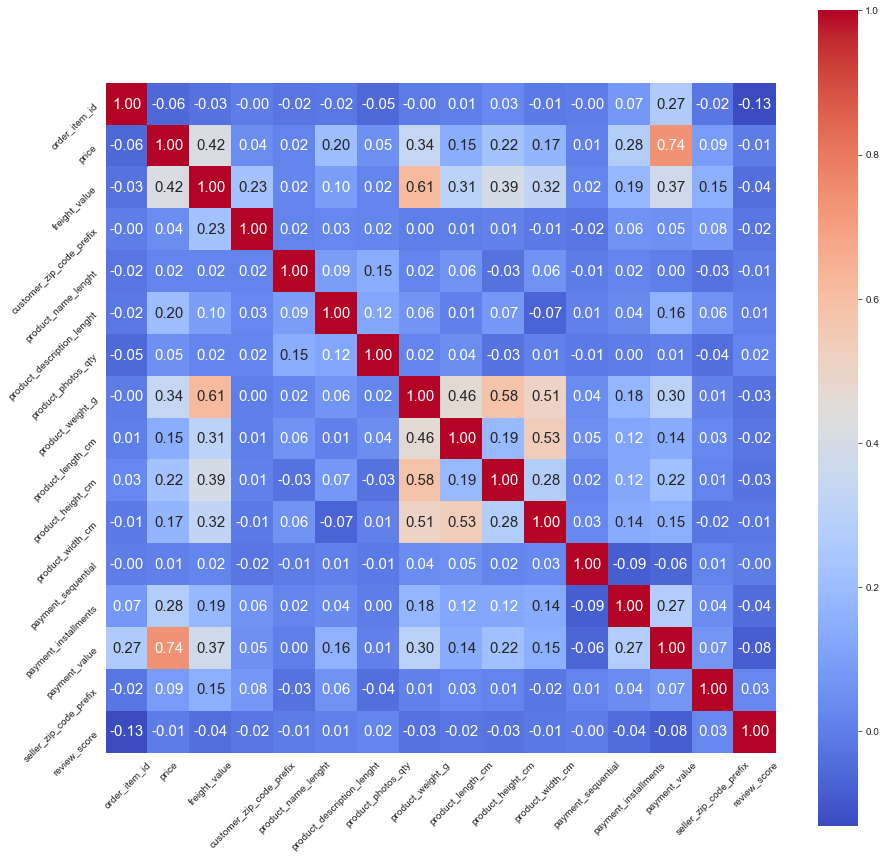

In [69]:
plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### Conclusion 4

Conviene estudiar mas en detalle la relacion entre:

- order_item_id y payment_value (linea de pedido y valor del pago)

- product_weight y freight_value (peso del producto y valor del flete)

- price y payment_installments (precio y cuotas)


# Árbol de decisión

In [106]:
#Importo librerías

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [107]:
#Hago un head del df

dfOrdenesCompletas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,Sin Titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,Sin Titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,Sin Titulo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,b46f1e34512b0f4c74a72398b03ca788,4,Sin Titulo,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,9350,maua,SP,housewares,dc90f19c2806f1abba9e72ad3c350073,5,Sin Titulo,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23


In [108]:
#Vamos a intentar predecir el valor de la review partiendo de las variables "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"
columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
X = dfOrdenesCompletas[columns]
y = dfOrdenesCompletas.review_score #Defino el target

In [109]:
#Divido el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77) 

In [110]:
#Creo el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 77)

In [111]:
#Entreno el modelo

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=77)

In [112]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [113]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.5629978187878343
% de aciertos sobre el set de evaluación: 0.5592566118656183


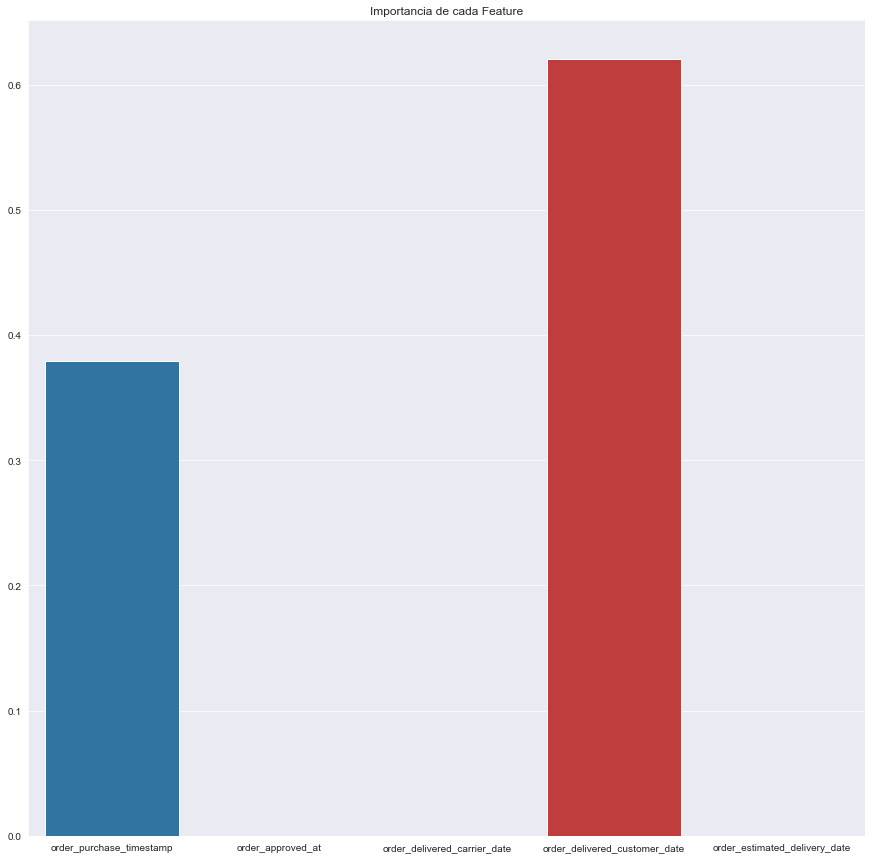

In [114]:
#Analizo cuáles variables son las más importantes dentro del modelo

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

### Conclusión 5

Pese a la casi nula correlación que existía en las variables, luego de entrenar el modelo logramos que el mismo reproduzca con un 55% de acierto la calificación de la review del cliente. Es probable que este resultado se haya logrado gracias a la gran cantidad de observaciones con las que cuenta el dataset.
También es importante destacar que parece que 3 variables serían inútiles en el modelo, bastaría con utilizar 'order_purchase_timestamp' y 'order_delivered_customer_date' para alcanzar resultados similares.
Debido a la poca diferencia que se aprecia entre los porcentajes de aciertos entre el conjunto de 'train' y el de 'test' podríamos afirmar que nuestro modelo no sufre de overfitting.